## EX- 1

#### By:
#### Jasmeet Kaur


_____________________________________________________________________________________________________________________________

Table of Contents:
1. Business Problem <br>
2. Data Cleaning/ Data Wrangling <br>
3. Exploratory Data Analysis (EDA) <br>
4. Feature Engineering and Data Vizualisation <br>
5. Regression Modelling <br>
6. Measuring accuracy of the model <br>
7. Summary <br>
8. Conclusion

## 1. Business Problem
A data science team is working on an important project related to forecasting house prices based on the high demand of the
Ontario real estate market. It was requested that you prepare a study regarding this subject using regression models. This notebook gives an overview of applying linear regression techniques to predict house prices

#### Installing and Importing required Libraries 

In [1]:
!pip install sweetviz
import sweetviz as sv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sb 
from sklearn.model_selection import train_test_split 

In [2]:
# Read the data set of flights
dataset= pd.read_csv("C:/Users/100902467/Desktop/AI Algo/dataset.csv")

# Printing the data
dataset

,Unnamed: 0,Address,AreaName,Price ($)
0,0,"86 Waterford Dr Toronto, ON",Richview,"$999,888.00"
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,"$399,900.00"
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,"$479,000.00"
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,"$285,900.00"
4,6,"#1409 - 230 King St Toronto, ON",Downtown,"$362,000.00"
...,...,...,...,...
25346,124922,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,"$154,900.00"
25347,124924,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,"$624,900.00"
25348,124925,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,"$899,000.00"
25349,124928,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,"$295,000.00"


### 2. Data Cleaning

Droping null values of dataframe

In [3]:
dataset = dataset.dropna()

In [4]:
dataset

,Unnamed: 0,Address,AreaName,Price ($)
0,0,"86 Waterford Dr Toronto, ON",Richview,"$999,888.00"
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,"$399,900.00"
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,"$479,000.00"
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,"$285,900.00"
4,6,"#1409 - 230 King St Toronto, ON",Downtown,"$362,000.00"
...,...,...,...,...
25346,124922,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,"$154,900.00"
25347,124924,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,"$624,900.00"
25348,124925,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,"$899,000.00"
25349,124928,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,"$295,000.00"


To perform regression analysis, the target variable i.e. Price ($) should be numeric.  Therefore the values of Price ($) variable must be formatted by removing $ sign and ','.  Also, changing Price ($) variable name to 'Price' to make it easily accessible

In [5]:
dataset = dataset.rename(columns = {'Price ($)':'Price'})

In [6]:
dataset

,Unnamed: 0,Address,AreaName,Price
0,0,"86 Waterford Dr Toronto, ON",Richview,"$999,888.00"
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,"$399,900.00"
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,"$479,000.00"
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,"$285,900.00"
4,6,"#1409 - 230 King St Toronto, ON",Downtown,"$362,000.00"
...,...,...,...,...
25346,124922,"3100 CARLING AVENUE UNIT#416 Ottawa, ON",Bayshore,"$154,900.00"
25347,124924,"5827 GLADEWOODS PLACE Ottawa, ON",Orléans,"$624,900.00"
25348,124925,"6349 DEERMEADOW DRIVE Ottawa, ON",Greely,"$899,000.00"
25349,124928,"212 ALVIN ROAD Ottawa, ON",Rockcliffe - Manor Park,"$295,000.00"


In [7]:
dataset['Price'] = dataset['Price'].str.replace('[\$\,]',"")

C:\Users\100902467\AppData\Local\Temp\ipykernel_6884\1774869422.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Price'] = dataset['Price'].str.replace('[\$\,]',"")


The Price attribute should contain numeric values. But by analysing the dataset, it can be seen that Price variable has ' -   ' value. Changing this value to 0. Also, changing the price values to integer type. This is important to create mean_price variable in the dataset. This is achieved by first changing object type of 'Price' variable to float and then to integer

In [8]:
dataset['Price'] = dataset['Price'].replace([' -   '], '0')

In [9]:
dataset['Price'] = dataset['Price'].astype(float)

In [10]:
dataset['Price'] = dataset['Price'].apply(int)

Dropping Unnamed: 0 Column

In [11]:
dataset = dataset.drop(['Unnamed: 0'], axis = 1)

### 3. Exploratory Data Analysis (EDA)

#### 3.1 Using sweetviz module to generate html report
The analyze module will be used to generate report

In [12]:
dataset_report = sv.analyze(dataset)
dataset_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


From the report, it can be seen that there are no missing values in our cleaned dataset. The Price has Range from 0 to 32.5M

#### 3.2 Displaying concise summary for variables
Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. It shows the data type of variables and count of non null values for the variables

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24868 entries, 0 to 25350
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Address   24868 non-null  object
 1   AreaName  24868 non-null  object
 2   Price     24868 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 777.1+ KB


#### 3.3 Displaying Descriptive statistics
Dataframe.describe() method is used for Descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [14]:
dataset.describe()

,Price
count,2.486800e+04
mean,5.669701e+05
std,8.533163e+05
min,0.000000e+00
25%,2.215000e+05
50%,3.749000e+05
75%,6.199000e+05
max,3.250000e+07


#### 3.4 Displaying number of null values for each column
Dataframe.isnull().sum() method is used to display number of null values for each column. The following result shows that arr_delay has null values. This information is useful in subsequent tasks

In [15]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Address,0,0.0
AreaName,0,0.0
Price,0,0.0


#### 3.5 Displaying unique Area names
unique() method will be used to display the unique values for Aarea names

In [16]:
dataset['AreaName'].unique()

array(['Richview', 'Chedoke Park B', 'Ainslie Wood East', ..., 'Gershome',
       'Thorner', 'Appleby'], dtype=object)

#### 3.6 Creating new variables 'mean_price' and 'AreaCategory'
Creating a new variable to store mean price of each area. As the price range shows a lot of variation for the given area, linear regression can also be performed on mean price as target variable

In [17]:
dataset['mean_price'] = dataset.groupby('AreaName').Price.transform('mean')
# displaying first five values of dataset.
dataset.head()

,Address,AreaName,Price,mean_price
0,"86 Waterford Dr Toronto, ON",Richview,999888,727238.400000
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,399900.000000
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,555906.833333
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,466700.250000
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,590745.634940


Creating category codes for area name and storing them in new variable 'AreaCategory'. This encoding will convert the string to numeric and help understand any correlation between area and price or mean price

In [18]:
dataset['AreaCategory'] = dataset.AreaName.astype('category').cat.codes
# displaying first five values of dataset
dataset.head()

,Address,AreaName,Price,mean_price,AreaCategory
0,"86 Waterford Dr Toronto, ON",Richview,999888,727238.400000,830
1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,399900.000000,218
2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,555906.833333,7
3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,466700.250000,434
4,"#1409 - 230 King St Toronto, ON",Downtown,362000,590745.634940,308


#### 3.7 Displaying correlation between variables


In [19]:
dataset.corr()

,Price,mean_price,AreaCategory
Price,1.000000,0.515539,0.014026
mean_price,0.515539,1.000000,0.027207
AreaCategory,0.014026,0.027207,1.000000


<AxesSubplot:>

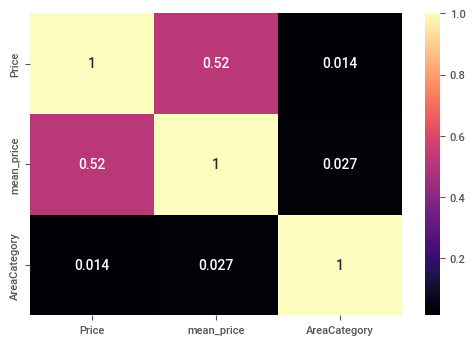

In [20]:
#Building Heatmap for displaying correlation
sb.heatmap(dataset.corr(), annot = True, cmap = 'magma')

Conclusion: There is a very weak correlation between Price and Area as well as between mean price and Area

### 4. Feature Engineering and Data Vizualisation 

###### Plotting Pairplot for the dataset variables

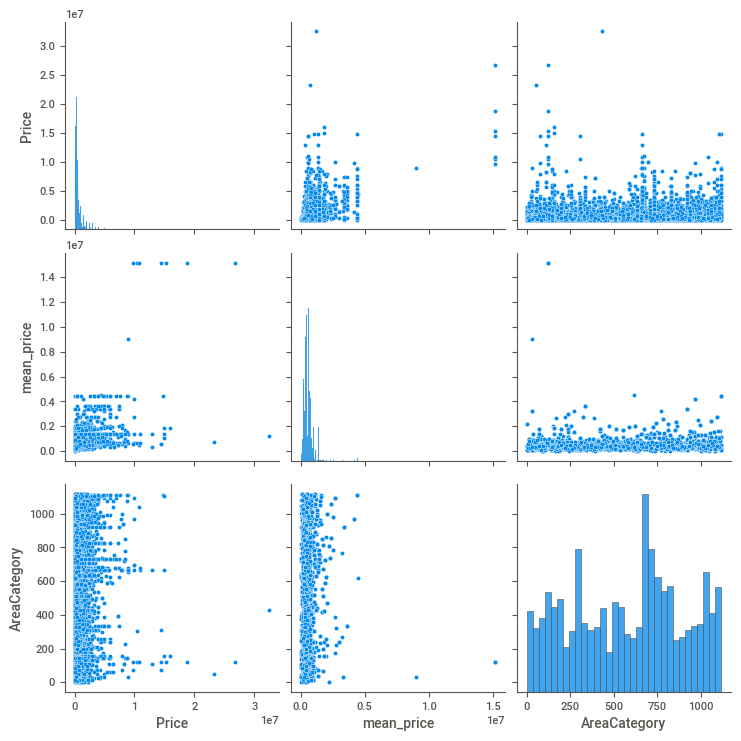

In [21]:
sb.pairplot(dataset)

From the plot it can be seen that there is no linear relationship between price and area.
Also, it can be seen from the scatter plot of mean price vs area that there is no linear relationship between mean price and area. Plotting the individual scatterplot for area vs price. 

##### Plotting scatterplot for Area vs Price

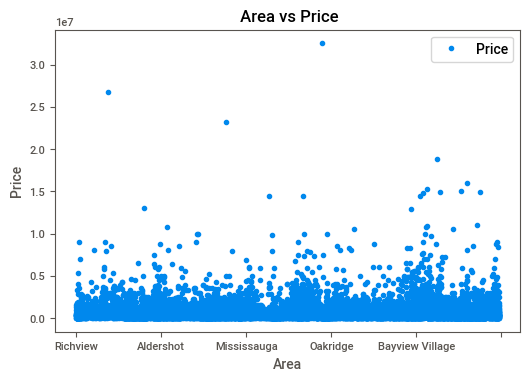

In [22]:
dataset.plot(x='AreaName', y='Price', style='o')  
plt.title(' Area vs Price')  
plt.xlabel('Area')  
plt.ylabel('Price')  
plt.show()

From the scatterplot it can be seen that there is no linear relationship between price and area.

#### Report: Creatng a Vizualization to display top 5 areas with highest mean price
Step 1: Creating a dataframe report to contain top 5 areas with highest mean price <br>
Step 2: Using plot method on dataframe to generate bar plot <br>
Step 3: adding data labels

[Text(0, 0, '1.51833e+07'),
 Text(0, 0, '9e+06'),
 Text(0, 0, '4.4999e+06'),
 Text(0, 0, '4.43624e+06'),
 Text(0, 0, '4.19833e+06')]

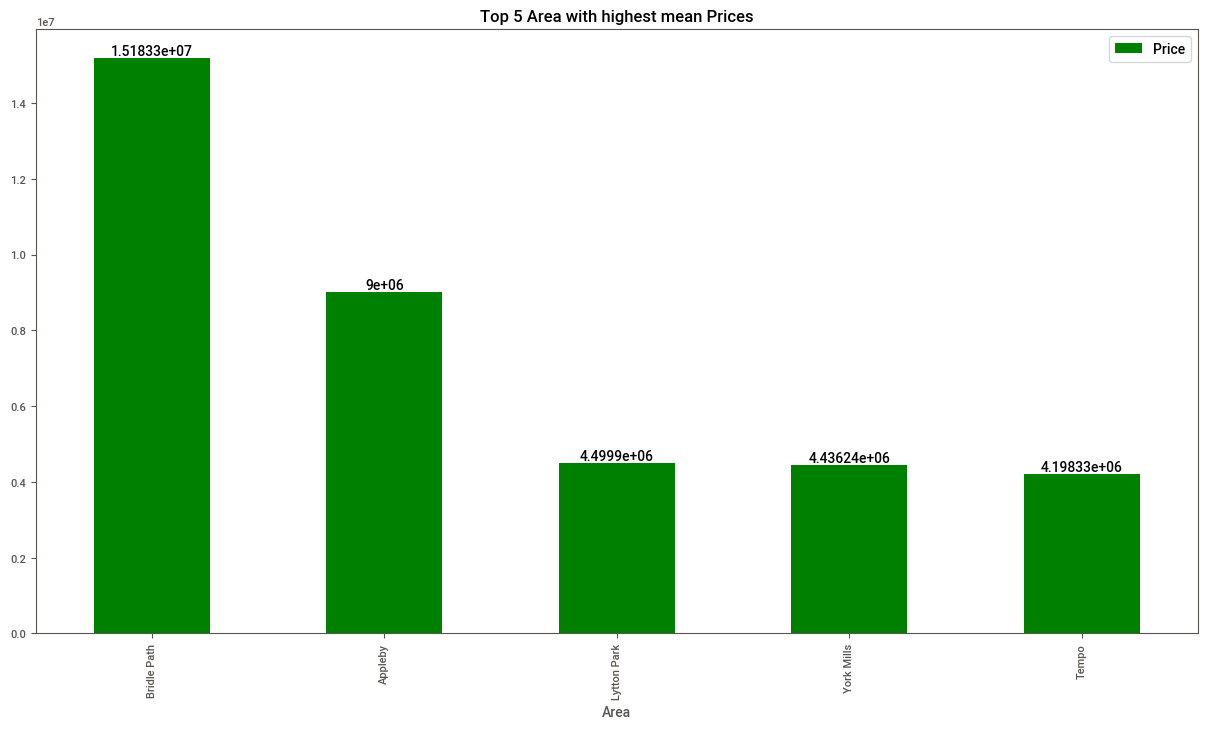

In [23]:
#step 1
report = dataset.groupby('AreaName')['Price'].mean().to_frame().nlargest(5, 'Price')
#step 2
ax3 = report.plot(kind='bar', title='Top 5 Area with highest mean Prices', ylabel='', color = 'green', 
         xlabel='Area', figsize=(15, 8))
#step 3
ax3.bar_label(ax3.containers[0])

Conclusion: Bridle Path has the highest mean price of property followed by Appleby

C:\Users\100902467\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

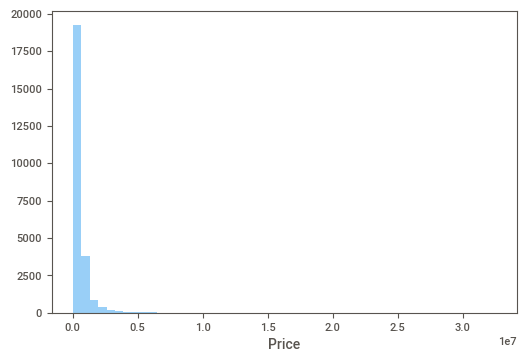

In [24]:
sb.distplot(dataset['Price'], kde = False)

The distribution of price is positive skew or right skew

<AxesSubplot:xlabel='AreaCategory'>

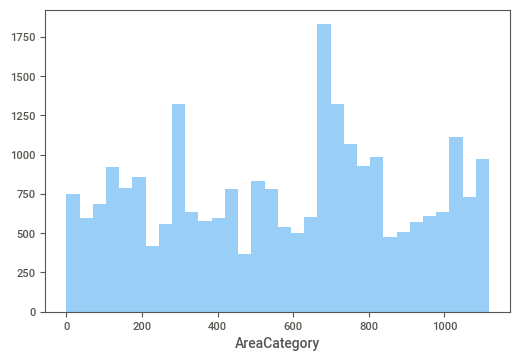

In [25]:
sb.distplot(dataset['AreaCategory'], kde = False)

The distribution of area is almost even in dataset

### 5. Regression Modelling

Splitting the dataset into target variables (y1 and y2) and dependent variable series (X)

In [26]:
X = dataset['AreaCategory'].values.reshape(-1,1)

In [27]:
y1 = dataset['Price'].values.reshape(-1,1)

In [28]:
y2 = dataset['mean_price'].values.reshape(-1,1)

Splitting the dataset into test and training sets.We split 80% of the data to the training set while 20% of the data to test set using below code. The test_size variable is where we actually specify the proportion of the test set.

In [29]:
# Defining Training and test set w.r.t Price variable
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.2, random_state=0)

In [30]:
# Defining Training and test set w.r.t mean_price variable
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y1, test_size=0.2, random_state=0)

In [31]:
# training the Linear Regrssion algorithM w.r.t Price variable
regressor1 = LinearRegression() 
regressor1.fit(X_train1, y_train1)


LinearRegression()

In [32]:
# training the Linear Regrssion algorithM w.r.t mean_Price variable
regressor2 = LinearRegression() 
regressor2.fit(X_train2, y_train2)

LinearRegression()

The linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code. y = mx + b ( m = slope || b = intercept)

In [33]:
# Given that it is a line ( y= mx+b ) , let's calculate the slope and intercept w.r.t Price Variable

#For retrieving the slope:
print(regressor1.coef_)

#To retrieve the intercept:
print(regressor1.intercept_)

[[13.06666913]]
[559463.90095227]


In [34]:
# Given that it is a line ( y= mx+b ) , let's calculate the slope and intercept w.r.t mean_price Variable

#For retrieving the slope:
print(regressor2.coef_)

#To retrieve the intercept:
print(regressor2.intercept_)

[[13.06666913]]
[559463.90095227]


The coeffecient and intercept for both regression models is same.

### 6. Measuring accuracy of the model
Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score using R2 score value

In [35]:
regressor1.score(X, y1)

0.00011352163010580618

In [36]:
regressor2.score(X, y2)

0.0004271248811856809

Both the models have very low performance score.
Therefore, Linear Regression is not good model to find relation between the Area and price of property or between area and mean price for given dataset.
The same can be validated through the Mean Absolute Error.  

In [37]:
y_pred1 = regressor1.predict(X_test1)
y_pred2 = regressor2.predict(X_test2)

In [38]:
df = pd.DataFrame({'Actual price': y_test1.flatten(), 'Predicted price': y_pred1.flatten()})
df

,Actual price,Predicted price
0,519900,571589.769900
1,988000,570296.169657
2,329900,564390.035212
3,659888,565160.968691
4,425550,562168.701461
...,...,...
4969,89900,567944.169214
4970,1800000,573432.170247
4971,375000,561881.234740
4972,99900,572974.836828


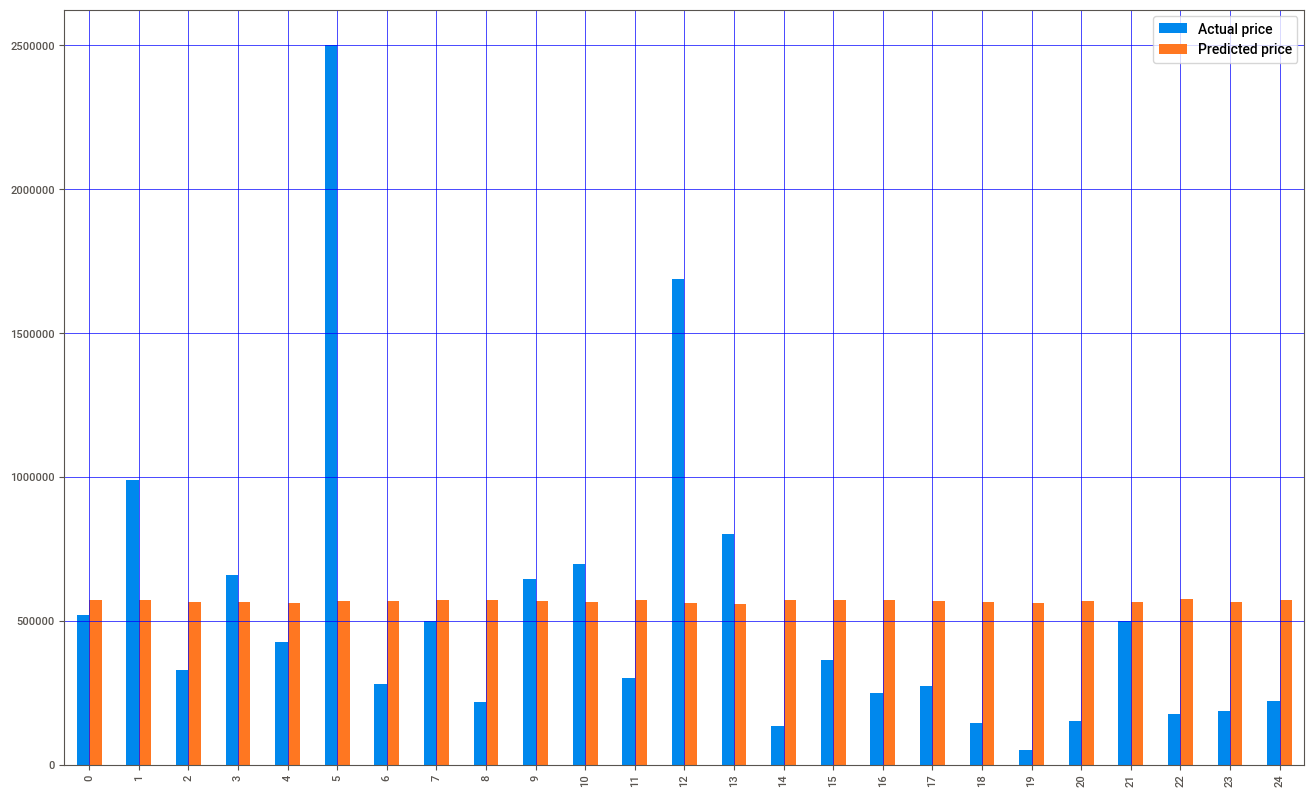

In [39]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='orange')
plt.show()

The plot shows that our model is not very precise, the predicted percentages are far away from the actual ones. Let's plot our straight line with the test data :

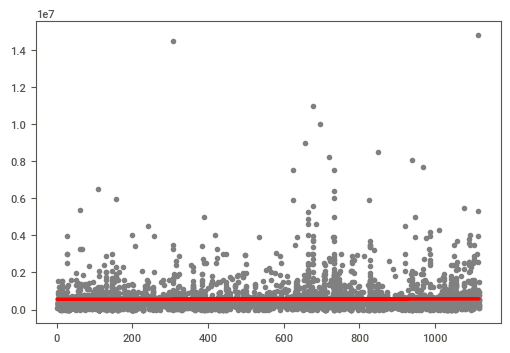

In [40]:
plt.scatter(X_test1, y_test1,  color='gray')
plt.plot(X_test1, y_pred1, color='red', linewidth=2)
plt.show()

The straight line in the above graph shows our algorithm is not correct. The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

Mean Absolute Error: 400397.09014149033
Mean Squared Error: 593979842740.6466
Root Mean Squared Error: 770700.8776046947


All the values (Mean Absolute Error, Mean Squared Error, Root Mean Squared Error) are so high that we can conclude regression model is not appropriate to find relation price and area. 
Therefore, we can conclude we cannot predict prices from the given attributes of the dataset.
There is no relation between prices and area

### 7. Summary

The given dataset is not complete and the price of property does not depend solely and completely on the price and mean_price of the property because: <br>
1. The correlation coeffecient between price and mean price is very low as can be seen from heatmap above. (Correlation coefficient between Area and price: 0.014 and Correlation coeffecient between Area and price: 0.027. <br>
2. Also, it can be seen from the scatter plot of mean price vs area and price vs area that there is no linear relationship between mean price and area. Plotting the individual scatterplot for area vs price. <br>
3. The Linear Regression models between area and price and area and mean price have very low performance score. Therefore, Linear Regression is not good model to find relation between the Area and price of property or between area and mean price for given dataset. The same was validated through the Mean Absolute Error which was very high. The plot shows that our model is not very precise, the predicted percentages are far away from the actual ones.<br>


### 8. Conclusion

The Regression Model shows poor performance. This is because there are so many factors that affect property price that the model did not consider. These factors include things like:

1. the age of a property
2. the size of each bedroom
3. the number of bathrooms
4. the condition the property is in
5. the amenities available in the local area
6. the exact style and layout of the property
7. if there are any furnishings provided alongside
8. if there is any private parking, and if so, for how many vehicles
9. if there is any land/garden, and if so, the size
10. the number of bathrooms
All of these are important features in the valuation process, which simply play too big a role. With data for these, I feel a better model could be created, as each one allows you to narrow down the price range, some more so than others. We can conclude that the data provided in the dataset does not provide enough information to predict property price    